<a href="https://colab.research.google.com/github/econ105/AI/blob/main/Python/Top_10_performance_stock_in_Hong_Kong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1516577189.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  10 of 10 completed


Top 10 HK Stocks - Latest Close Prices:
--------------------------------------------------
CKH HOLDINGS (0001.HK): 63.20 HKD
PING AN (2318.HK): 70.55 HKD
HSBC HOLDINGS (0005.HK): 134.30 HKD
AIA (1299.HK): 82.30 HKD
HK & CHINA GAS (0003.HK): 7.63 HKD
POWER ASSETS (0006.HK): 61.45 HKD
HKEX (0388.HK): 407.80 HKD
CCB (0939.HK): 8.04 HKD
CLP HOLDINGS (0002.HK): 76.45 HKD
TENCENT (0700.HK): 522.00 HKD


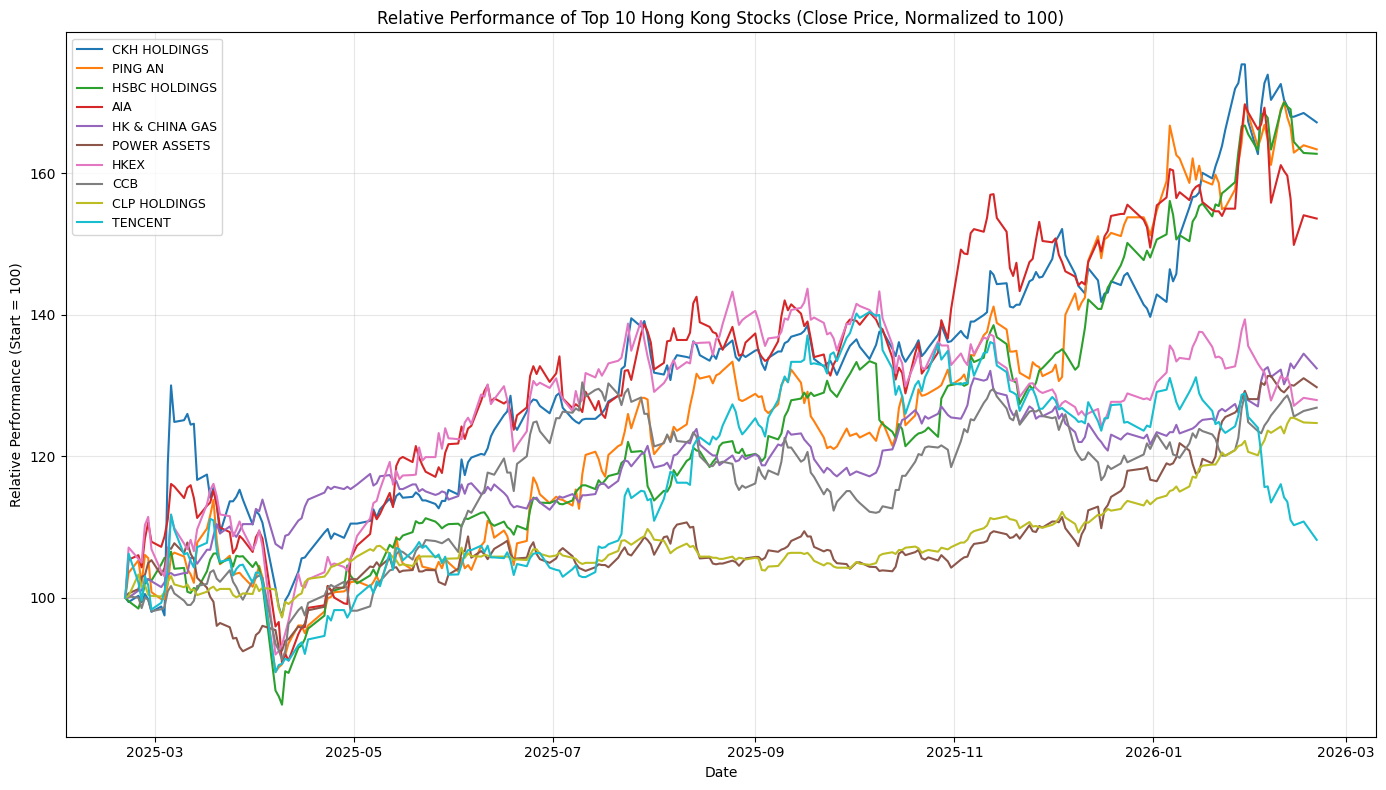

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickers = [
    "0005.HK", "0001.HK", "0002.HK", "0003.HK", "0006.HK",
    "0700.HK", "0939.HK", "1299.HK", "0388.HK", "2318.HK",
    # ... add more HK tickers here ...
]

# Map ticker -> company name
name_map = {}
for t in tickers:
    info = yf.Ticker(t).info
    name = info.get("shortName") or info.get("longName") or t
    name_map[t] = name

data = yf.download(
    tickers,
    period="1y",
    interval="1d"
)["Close"]

data = data.dropna(axis=1, how="all")

first_prices = data.ffill().bfill().iloc[0]
last_prices = data.ffill().bfill().iloc[-1]
total_return = (last_prices / first_prices) - 1

# Top 10
top_10 = total_return.sort_values(ascending=False).head(10).index
top_data = data[top_10].ffill().bfill()
rel_perf = top_data.divide(top_data.iloc[0]) * 100

# Print stock names and latest prices
print("Top 10 HK Stocks - Latest Close Prices:")
print("-" * 50)
for ticker in top_10:
    latest_price = top_data[ticker].iloc[-1]
    name = name_map.get(ticker, ticker)
    print(f"{name} ({ticker}): {latest_price:.2f} HKD")

plt.figure(figsize=(14, 8))
for col in rel_perf.columns:
    label_name = name_map.get(col, col)
    plt.plot(rel_perf.index, rel_perf[col], linewidth=1.5, label=label_name)

plt.title("Relative Performance of Top 10 Hong Kong Stocks (Close Price, Normalized to 100)")
plt.xlabel("Date")
plt.ylabel("Relative Performance (Start = 100)")
plt.grid(True, alpha=0.3)
plt.legend(loc="upper left", fontsize=9)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2062310687.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  10 of 10 completed


Top 10 HK Stocks - Latest Close Prices:
--------------------------------------------------
CKH HOLDINGS (0001.HK): 63.20 HKD
PING AN (2318.HK): 70.55 HKD
HSBC HOLDINGS (0005.HK): 134.30 HKD
AIA (1299.HK): 82.30 HKD
HK & CHINA GAS (0003.HK): 7.63 HKD
POWER ASSETS (0006.HK): 61.45 HKD
HKEX (0388.HK): 407.80 HKD
CCB (0939.HK): 8.04 HKD
CLP HOLDINGS (0002.HK): 76.45 HKD
TENCENT (0700.HK): 522.00 HKD


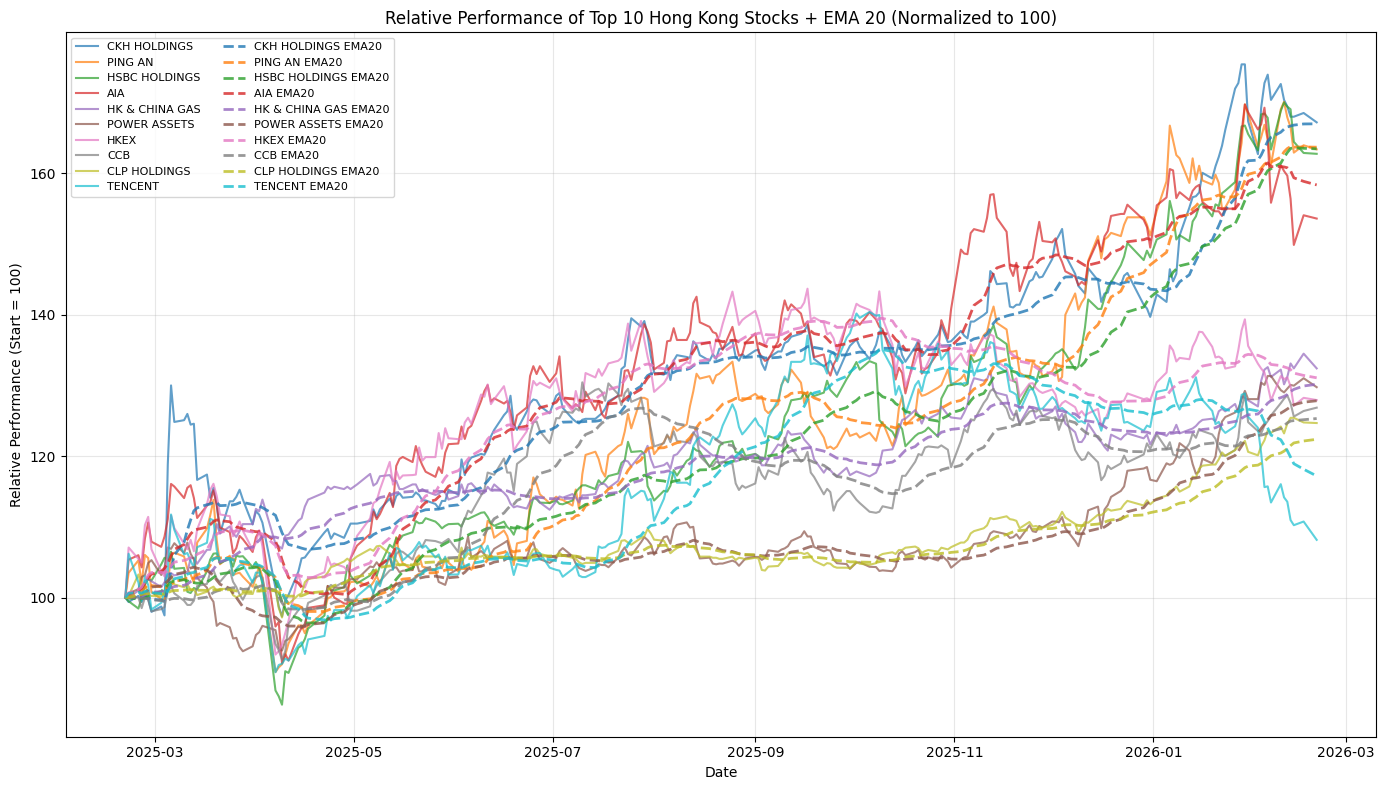

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tickers = [
    "0005.HK", "0001.HK", "0002.HK", "0003.HK", "0006.HK",
    "0700.HK", "0939.HK", "1299.HK", "0388.HK", "2318.HK",
    # ... add more HK tickers here ...
]

name_map = {}
for t in tickers:
    info = yf.Ticker(t).info
    name = info.get("shortName") or info.get("longName") or t
    name_map[t] = name

data = yf.download(
    tickers,
    period="1y",
    interval="1d"
)["Close"]

data = data.dropna(axis=1, how="all")

first_prices = data.ffill().bfill().iloc[0]
last_prices = data.ffill().bfill().iloc[-1]
total_return = (last_prices / first_prices) - 1

top_10 = total_return.sort_values(ascending=False).head(10).index
top_data = data[top_10].ffill().bfill()
rel_perf = top_data.divide(top_data.iloc[0]) * 100

# Compute EMA 20 on relative performance
ema_20 = rel_perf.ewm(span=20, adjust=False).mean()

# Print stock names and latest prices
print("Top 10 HK Stocks - Latest Close Prices:")
print("-" * 50)
for ticker in top_10:
    latest_price = top_data[ticker].iloc[-1]
    name = name_map.get(ticker, ticker)
    print(f"{name} ({ticker}): {latest_price:.2f} HKD")

plt.figure(figsize=(14, 8))
for col in rel_perf.columns:
    label_name = name_map.get(col, col)
    plt.plot(rel_perf.index, rel_perf[col], linewidth=1.5, label=label_name, alpha=0.7)

# Plot EMA 20 for each stock
for col in ema_20.columns:
    plt.plot(ema_20.index, ema_20[col], linewidth=2,
             linestyle="--", alpha=0.8,
             label=f"{name_map.get(col, col)} EMA20")

plt.title("Relative Performance of Top 10 Hong Kong Stocks + EMA 20 (Normalized to 100)")
plt.xlabel("Date")
plt.ylabel("Relative Performance (Start = 100)")
plt.grid(True, alpha=0.3)
plt.legend(loc="upper left", fontsize=8, ncol=2)
plt.tight_layout()
plt.show()
